# Here is the data preparation process

## imports and house-keeping

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

In [9]:
%matplotlib inline
print(tf.__version__)

2.6.0


## Different dataset preparation:    
  

  Define the route to where the images are found

In [30]:
goya_data_dir = '/home/db/Desktop/corecode/final_data/artwork/images/Francisco_Goya/'
vicent_data_dir = '/home/db/Desktop/corecode/final_data/artwork/images/Vincent_van_Gogh/'
picasso = '/home/db/Desktop/corecode/final_data/artwork/images/Pablo_Picasso/'
warhol_test='/home/db/Desktop/corecode/final_data/artwork/ready_2_use/warhol_test_128/'
van_gogh='/home/db/Desktop/corecode/final_data/artwork/ready_2_use/van128_128/'
dali='/home/db/Desktop/corecode/final_data/artwork/ready_2_use/dali/'

all_data = '/home/db/Desktop/corecode/final_data/artwork/ready_2_use/all_color_64/'
scenery = '/home/db/Desktop/corecode/final_data/scenery/original_slice/'

test_104 = '/home/db/Desktop/corecode/final_data/artwork/images/Andy_Warhol/'

impressionism = '/home/db/Desktop/corecode/final_data/artwork/workshop/impressionism/'
surrealism = '/home/db/Desktop/corecode/final_data/artwork/workshop/surrealism/'
gaugin = '/home/db/Desktop/corecode/final_data/artwork/images/Paul_Gauguin/'

In [31]:
#define desired data here
choice = gaugin

In [32]:
training_data=[]
exceptions = []
IMG_SIZE = 128
IMG_CHANNELS = 3
img_path = os.path.join(choice)

In [33]:
def create_training_data():
    for art in os.listdir(img_path):
        try:            
            img_array = cv2.imread(os.path.join(img_path,art))
            new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE),IMG_CHANNELS )            
            training_data.append(new_array)
        except Exception as e:
            exceptions.append(e)
            
        

In [34]:
 create_training_data()

In [35]:
print (f'amount of images: {len(training_data)}\ndata shape: {training_data[1].shape}\ndata type: {type(training_data)} \nnumber of exceptions: {len(exceptions)}')

amount of images: 311
data shape: (128, 128, 3)
data type: <class 'list'> 
number of exceptions: 0


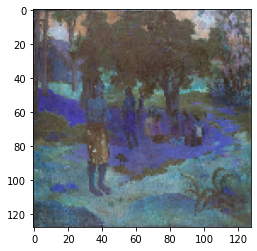

In [39]:
plt.imshow(training_data[random.randrange(0,len(training_data))])

To end, we will save the array as an NPY to load it into our models later

In [40]:
X = np.asarray(training_data)

In [41]:
X = X/255

## Here you can save the image(s) array to a NPY file

All is in order, so we save the array as a numpy object, for efficiency   
Files are saved in parent directory, outside of GIT repository due to space limitations

In [42]:
name_of_data_set = 'gaugin'

In [43]:
np.save(f'../../final_data/saved_data/{name_of_data_set}.npy', X)

## Here you can save your array to image files in a predefined folder

In [ ]:
folder='/home/db/Desktop/corecode/final_data/artwork/ready_2_use/all_color_64/'

In [ ]:
for i in range (len(training_data)):
    cv2.imwrite(folder+f'art{str(i)}.png',training_data[i])